In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from datetime import datetime
import json
from wordcloud import WordCloud

%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings(action="ignore")

# Goal : Predict Customer Life-time Value (CLV )for an Auto Insurance Company.
Customer lifetime value is the net profit acquired from a customer throughout a company’s relationship with them.

Knowing each customer’s customer lifetime value helps you know how much you should be spending on customer acquisition. A customer’s acquisition cost could be more than what they spend on their purchase, but if you nurture that relationship, their CLV may grow to an amount that’s well worth the investment. That’s just one of the many reasons why success in the customer-centered economy means understanding the importance of customer lifetime value.

In [2]:
df = pd.read_csv('Marketing-Customer-Value-Analysis.csv')
df.sort_values('Customer Lifetime Value')

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
6037,UM17151,California,1898.01,No,Basic,Bachelor,2/26/11,Unemployed,M,0,...,91,3,1,Personal Auto,Personal L2,Offer1,Agent,413.61,Two-Door Car,Medsize
2210,CI68869,Arizona,1898.68,No,Basic,College,1/8/11,Unemployed,F,0,...,20,5,1,Personal Auto,Personal L3,Offer3,Agent,702.02,Two-Door Car,Small
2771,XT54610,California,1904.00,No,Basic,Bachelor,1/14/11,Unemployed,F,0,...,7,3,1,Personal Auto,Personal L1,Offer1,Agent,302.40,Four-Door Car,Medsize
7083,EH70612,California,1918.12,No,Basic,College,2/15/11,Unemployed,M,0,...,54,2,1,Personal Auto,Personal L1,Offer1,Branch,439.20,Two-Door Car,Small
6711,XI84293,Oregon,1940.98,No,Basic,High School or Below,2/7/11,Unemployed,M,0,...,40,3,1,Personal Auto,Personal L3,Offer3,Call Center,475.20,Two-Door Car,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5279,SK66747,Washington,66025.75,No,Basic,Bachelor,2/22/11,Employed,M,33481,...,46,0,2,Personal Auto,Personal L3,Offer1,Agent,1194.89,Luxury SUV,Medsize
7283,KH55886,Oregon,67907.27,No,Premium,Bachelor,2/5/11,Employed,M,78310,...,18,1,2,Personal Auto,Personal L1,Offer1,Agent,151.71,Sports Car,Medsize
6252,BP23267,California,73225.96,No,Extended,Bachelor,2/9/11,Employed,F,39547,...,21,0,2,Personal Auto,Personal L3,Offer1,Branch,969.60,Luxury SUV,Medsize
1974,YC54142,Washington,74228.52,No,Extended,High School or Below,1/26/11,Unemployed,M,0,...,34,0,2,Personal Auto,Personal L1,Offer1,Branch,1742.40,Luxury Car,Medsize


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
df.head().T

,0,1,2,3,4
Customer,BU79786,QZ44356,AI49188,WW63253,HB64268
State,Washington,Arizona,Nevada,California,Washington
Customer Lifetime Value,2763.52,6979.54,12887.43,7645.86,2813.69
Response,No,No,No,No,No
Coverage,Basic,Extended,Premium,Basic,Basic
Education,Bachelor,Bachelor,Bachelor,Bachelor,Bachelor
Effective To Date,2/24/11,1/31/11,2/19/11,1/20/11,2/3/11
EmploymentStatus,Employed,Unemployed,Employed,Unemployed,Employed
Gender,F,F,F,M,M
Income,56274,0,48767,0,43836


In [5]:
#lets edit date format
df['Effective To Date']= df['Effective To Date'].astype('datetime64[ns]')

There are 9134 Observations of 24  Different Variable. (mix of categorical and continous DataType)

Dependent Variable is Customer Life Time Value as we have to predict the CLV.

Independent Variables are: Customer, StateCustomerLifetimeValue, Response, Coverage, Education, EffectiveToDate, EmploymentStatus, Gender, Income, LocationCode, MaritalStatus, MonthlyPremiumAuto, MonthsSinceLastClaim, MonthsSincePolicyInception, NumberofOpenComplaints, NumberofPoliciesPolicyType, Policy, RenewOfferType, SalesChannel, TotalClaimAmountVehicleClass, VehicleSize

Continues Independed Variables are : CustomerLifetimeValue, Income,MonthlyPremiumAuto, MonthsSinceLastClaim, MonthsSincePolicyInception, NumberofOpenComplaints, NumberofPolicies, TotalClaimAmount



In [6]:
df.describe()


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00
mean,8004.94,37657.38,93.22,15.10,48.06,0.38,2.97,434.09
std,6870.97,30379.90,34.41,10.07,27.91,0.91,2.39,290.50
min,1898.01,0.00,61.00,0.00,0.00,0.00,1.00,0.10
25%,3994.25,0.00,68.00,6.00,24.00,0.00,1.00,272.26
50%,5780.18,33889.50,83.00,14.00,48.00,0.00,2.00,383.95
75%,8962.17,62320.00,109.00,23.00,71.00,0.00,4.00,547.51
max,83325.38,99981.00,298.00,35.00,99.00,5.00,9.00,2893.24


In [7]:
df.isnull().sum()


Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

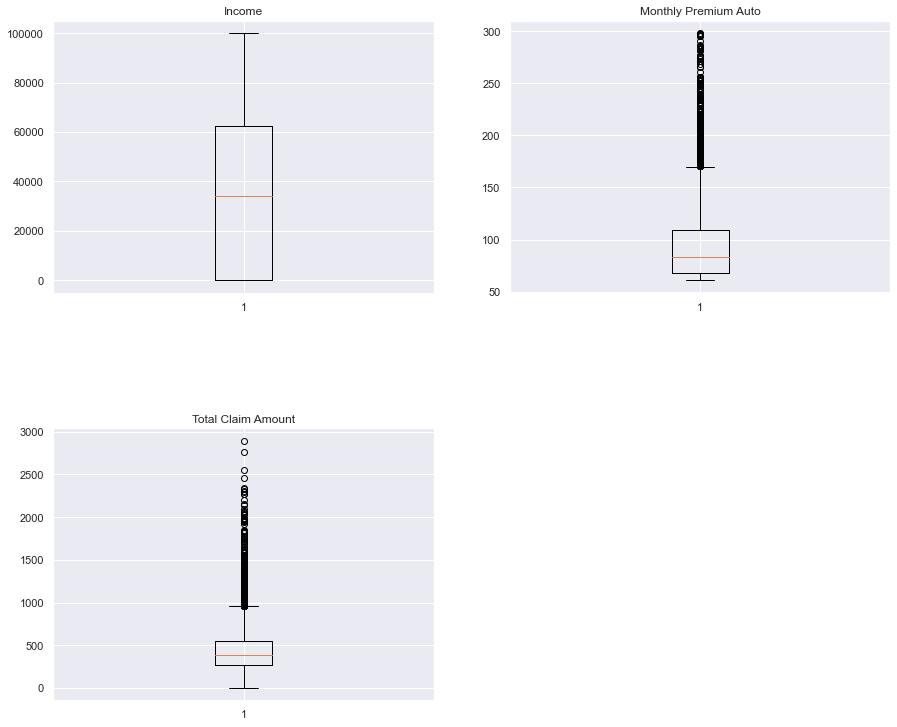

In [8]:
# Looking at outliers of continuos variables

significant_cont = ['Income','Monthly Premium Auto','Total Claim Amount']

sns.set(color_codes=True)
plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.5)

for i in range(len(significant_cont)):
    plt.subplot(3,2,i+1)
    plt.boxplot(df[significant_cont[i]])
    plt.title(significant_cont[i])
    
plt.show()

As we can see that there are outliers in the total claim amount and also in monthly premium auto , usually we remove the outliers for a better model.(Log)

And there are no outliers in the income.

Since our dataset is related to insurance and banking industry, we must be accept the outliers,as they can be our potential customers.



In [9]:
#checking all categorical variables to determine significant ones.

cat_df = df.select_dtypes(include='object')
cat_df = cat_df.drop(['Customer'], axis = 1)
cols = cat_df.columns
cols

Index(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

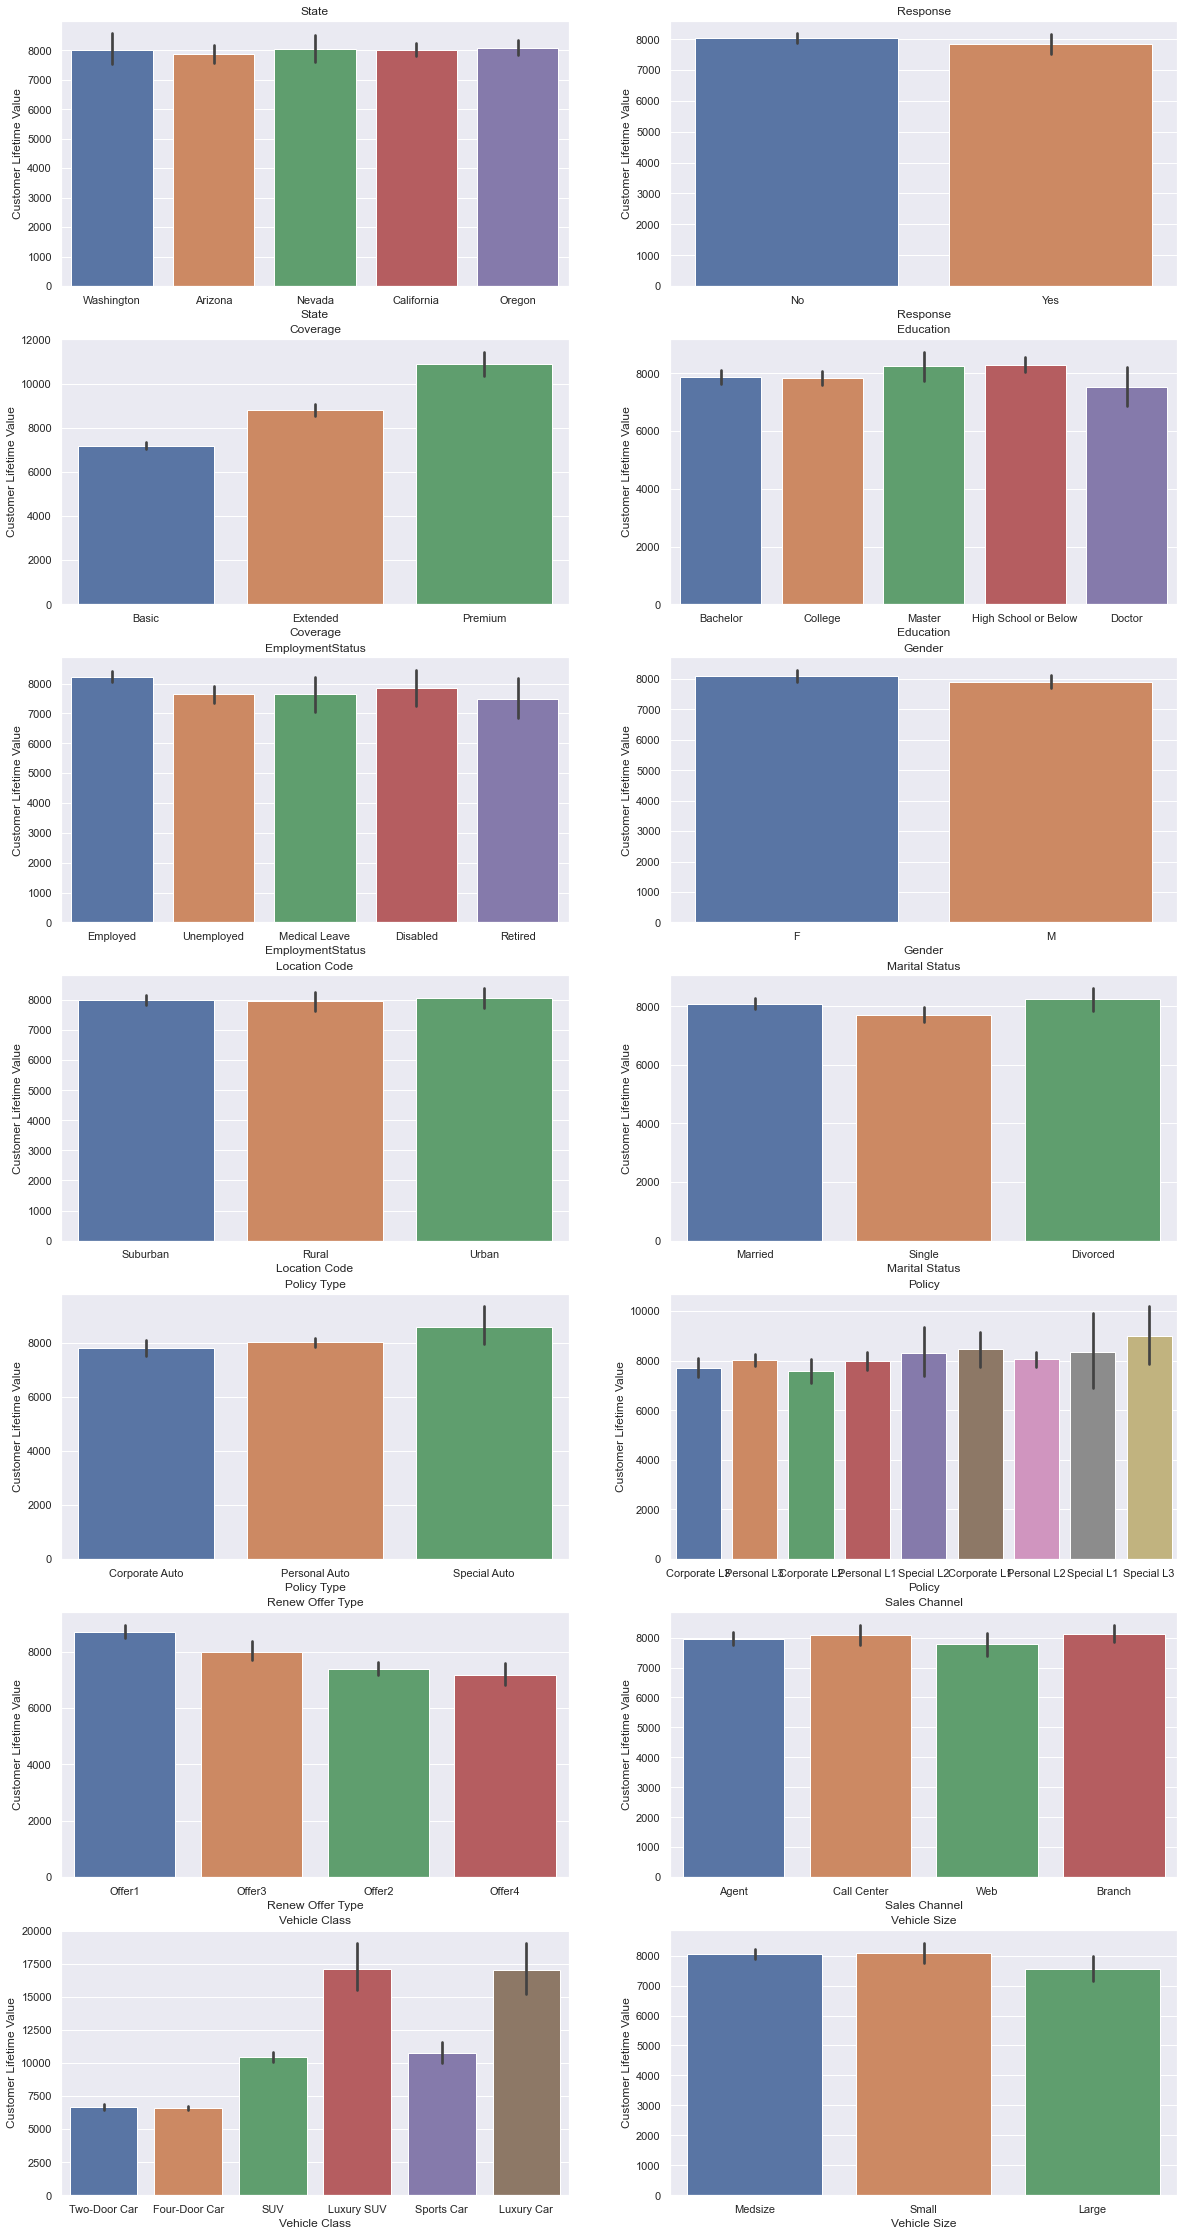

In [10]:
sns.set(color_codes=True)
plt.subplots_adjust(hspace=0.5)
plt.figure(figsize=(20,40))

for i in range(len(cols)):
    plt.subplot(7,2,i+1)
    sns.barplot(x = cols[i],y='Customer Lifetime Value',data = df)
    plt.title(cols[i])
    
plt.show()

Customers who have taken only 1 policy have lower customer lifetime value, and customers who have taken 3 or greater show a similar trend, so we can combine all of them into one bin, and we can also see that the customers who have taken 2 policies have very high customer lifetime value comparitively.

Customer Lifetime Value is different for different types of coverage.

Number of open complaints also show kind of similar trend, where people who have complaints 2 or lesser have a similar pattern but where as >3 do not show any pattern we will have to do statistical test to understand if this feature is really significant or not

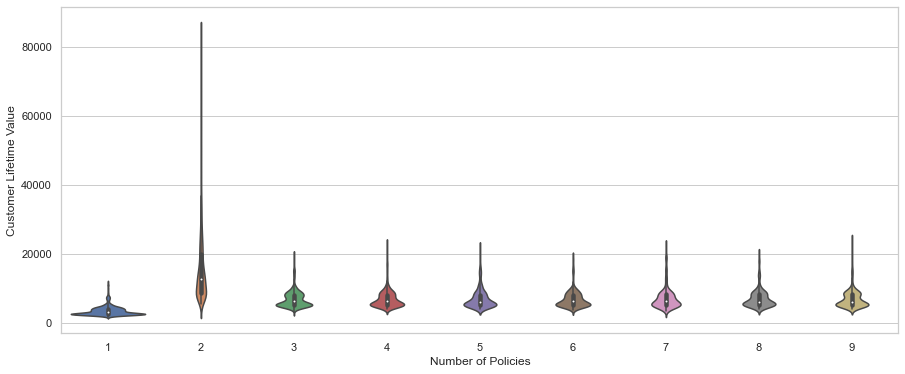

In [11]:

sns.set(style="whitegrid")
plt.figure(figsize=(15,6))
ax = sns.violinplot(x="Number of Policies", y="Customer Lifetime Value", data=df)


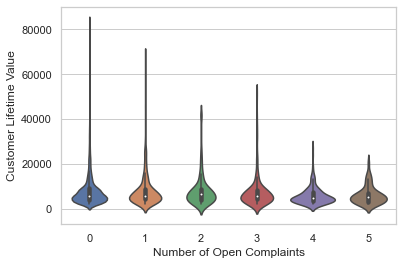

In [12]:
ax = sns.violinplot(x="Number of Open Complaints", y="Customer Lifetime Value", data=df)

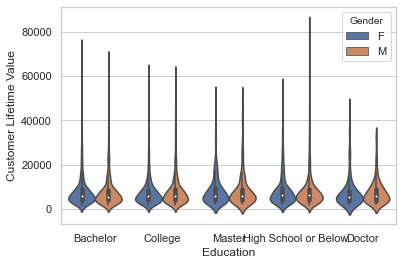

In [13]:
ax = sns.violinplot(x="Education", y="Customer Lifetime Value", data=df, hue='Gender')


# Statistical Analysis


Considering CLV (Customer Lifetime Value) as the target variable, we shall try to understand how each of the independent variables are contributing towards the target variable.

Since our target variable is a continuous variable, we will have to perform ANOVA to understand how significant are the independent variables towards target variable.



In [14]:
# Test whether Gender differences are significant or not.
gender = df[['Customer Lifetime Value','Gender']].groupby('Gender')
female = gender['Customer Lifetime Value'].get_group('F')
male = gender['Customer Lifetime Value'].get_group('M')

In [15]:
stats.ttest_ind(female,male)

Ttest_indResult(statistic=1.300686352501256, pvalue=0.19339865630769232)

MEANS ARE SAME FOR GENDER

pvalue > 0.05 implies that there is no significant difference in the mean of target variable for 'Gender' which means 'Gender' feature is not significant for predicting 'Customer Lifetime Value'

In [16]:
# Test whether Covarage differences are significant or not.
Coverage = df[['Customer Lifetime Value','Coverage']].groupby('Coverage')
Basic = Coverage['Customer Lifetime Value'].get_group('Basic')
Extended = Coverage['Customer Lifetime Value'].get_group('Extended')
Premium =Coverage['Customer Lifetime Value'].get_group('Premium')

In [17]:
stats.f_oneway(Basic,Extended,Premium)

F_onewayResult(statistic=133.67511419504908, pvalue=6.0158970099807e-58)

pvalue > 0.05 implies that there is no significant difference in the mean of target variable for 'Coverage' which means 'Gender' feature is not significant for predicting 'Customer Lifetime Value'

In [18]:
# Test whether Marital Status differences are significant or not.

Marital = df[['Customer Lifetime Value','Marital Status']].groupby('Marital Status')
married = Marital['Customer Lifetime Value'].get_group('Married')
single = Marital['Customer Lifetime Value'].get_group('Single')


In [19]:
stats.ttest_ind(married,single)

Ttest_indResult(statistic=2.1813329263939916, pvalue=0.029188701551162235)

pvalue < 0.05 implies that there is significant difference in the mean of target variable for atleast one group of 'Marital Status' which means 'Marital Status' feature can be a significant for predicting 'Customer Lifetime Value'

In [20]:
# Test whether Vehicle Class differences are significant or not.

Vehicleclass = df[['Customer Lifetime Value','Vehicle Class']].groupby('Vehicle Class')
fourdoor = Vehicleclass['Customer Lifetime Value'].get_group('Four-Door Car')
twodoor = Vehicleclass['Customer Lifetime Value'].get_group('Two-Door Car')
suv = Vehicleclass['Customer Lifetime Value'].get_group('SUV')
luxurysuv =Vehicleclass['Customer Lifetime Value'].get_group('Luxury SUV')
luxurycar =Vehicleclass['Customer Lifetime Value'].get_group('Luxury Car')
sportscar =Vehicleclass['Customer Lifetime Value'].get_group('Sports Car')



In [21]:
stats.f_oneway(fourdoor,twodoor,suv,luxurysuv,luxurycar,sportscar)

F_onewayResult(statistic=267.1581168024349, pvalue=2.085525760212929e-267)

In [22]:
# Test whether Renew Offer Type differences are significant or not.

Renewoffer = df[['Customer Lifetime Value','Renew Offer Type']].groupby('Renew Offer Type')
offer1 = Renewoffer['Customer Lifetime Value'].get_group('Offer1')
offer2 = Renewoffer['Customer Lifetime Value'].get_group('Offer2')
offer3 = Renewoffer['Customer Lifetime Value'].get_group('Offer3')
offer4 =Renewoffer['Customer Lifetime Value'].get_group('Offer4')



In [23]:
stats.f_oneway(offer1,offer2,offer3,offer4)

F_onewayResult(statistic=25.83261444494041, pvalue=1.238399930571374e-16)

In [24]:
# Test whether EmploymentStatus differences are significant or not.


EmploymentStatus = df[['Customer Lifetime Value','EmploymentStatus']].groupby('EmploymentStatus')
employed = EmploymentStatus['Customer Lifetime Value'].get_group('Employed')
unemployed = EmploymentStatus['Customer Lifetime Value'].get_group('Unemployed')
medleave = EmploymentStatus['Customer Lifetime Value'].get_group('Medical Leave')
disabled = EmploymentStatus['Customer Lifetime Value'].get_group('Disabled')
retired = EmploymentStatus['Customer Lifetime Value'].get_group('Retired')

In [25]:
stats.f_oneway(employed,unemployed,medleave,disabled,retired)

F_onewayResult(statistic=3.809808710328605, pvalue=0.00425058662383102)

pvalue < 0.05 implies that there is significant difference in the mean of target variable for atleast one group of 'EmploymentStatus' which means 'EmploymentStatus' feature can be a significant for predicting 'Customer Lifetime Value'

In [26]:

# Test whether Education differences are significant or not.

Education = df[['Customer Lifetime Value','Education']].groupby('Education')
bachelor = Education['Customer Lifetime Value'].get_group('Bachelor')
college = Education['Customer Lifetime Value'].get_group('College')
highschool = Education['Customer Lifetime Value'].get_group('High School or Below')
master = Education['Customer Lifetime Value'].get_group('Master')
doctor = Education['Customer Lifetime Value'].get_group('Doctor')

In [27]:
stats.f_oneway(bachelor,college,highschool,master,doctor)

F_onewayResult(statistic=2.4228653480521904, pvalue=0.04603615409468821)

pvalue < 0.05 implies that there is significant difference in the mean of target variable for atleast one group of 'Education' which means 'Education' feature can be a significant for predicting 'Customer Lifetime Value'

 ### Furthur Modelling:

#### So we did the EDA and also the Statistical Analysis, so now we can just disregard the features which we are not significant  for our model.

In [28]:
df2 =df.copy()

In [29]:
df2.drop(['State','Coverage','Renew Offer Type','Vehicle Class','Customer','Response','Gender','Location Code','Vehicle Size','Policy','Policy Type','Sales Channel','Effective To Date'],axis=1,inplace = True)

Though the features, months since policy inception, months since last claim, number of open complaints and number of policies are all numerical, but they are discrete numbers and we will consider them as categorical features while preparing the model.

Firstly, according to our EDA, we saw that the number of policies >= 3 have similar trend so we will group all of them as 3

In [30]:
df2['Number of Policies'] = np.where(df2['Number of Policies']>2,3,df2['Number of Policies'])

Lets get dummies of chosen categorical variables

In [31]:
new = pd.get_dummies(df2,columns=['Marital Status','Number of Policies','Education','EmploymentStatus'],drop_first=True)

In [32]:
new

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Total Claim Amount,Marital Status_Married,Marital Status_Single,Number of Policies_2,Number of Policies_3,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed
0,2763.52,56274,69,32,5,0,384.81,1,0,0,0,0,0,0,0,1,0,0,0
1,6979.54,0,94,13,42,0,1131.46,0,1,0,1,0,0,0,0,0,0,0,1
2,12887.43,48767,108,18,38,0,566.47,1,0,1,0,0,0,0,0,1,0,0,0
3,7645.86,0,106,18,65,0,529.88,1,0,0,1,0,0,0,0,0,0,0,1
4,2813.69,43836,73,12,44,0,138.13,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.99,71941,73,18,89,0,198.23,1,0,1,0,0,0,0,0,1,0,0,0
9130,3096.51,21604,79,14,28,0,379.20,0,0,0,0,1,0,0,0,1,0,0,0
9131,8163.89,0,85,9,37,3,790.78,0,1,1,0,0,0,0,0,0,0,0,1
9132,7524.44,21941,96,34,3,0,691.20,1,0,0,1,1,0,0,0,1,0,0,0


## Continious Variables

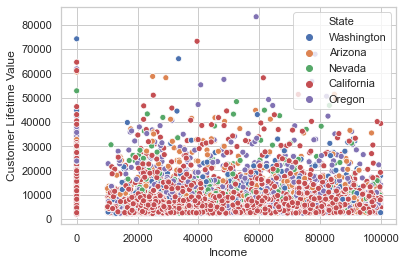

In [33]:

ax = sns.scatterplot(x="Income", y="Customer Lifetime Value", hue="State",
                     data=df)


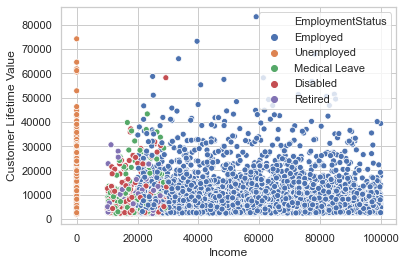

In [34]:

maritalstts = sns.scatterplot(x="Income", y="Customer Lifetime Value", hue="EmploymentStatus",
                     data=df)


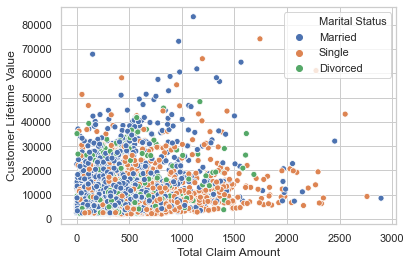

In [35]:

ax = sns.scatterplot(x="Total Claim Amount", y="Customer Lifetime Value", hue="Marital Status",
                     data=df)


In [46]:
import statsmodels.api as sm

y = new['Customer Lifetime Value']
x = new.drop('Customer Lifetime Value',axis=1)


x = sm.add_constant(x)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.635
Model:                                 OLS   Adj. R-squared:                  0.634
Method:                      Least Squares   F-statistic:                     881.3
Date:                     Mon, 08 Jun 2020   Prob (F-statistic):               0.00
Time:                             16:51:32   Log-Likelihood:                -89055.
No. Observations:                     9134   AIC:                         1.781e+05
Df Residuals:                         9115   BIC:                         1.783e+05
Df Model:                               18                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -4542.3757    293.171    -15.494      0.000   -5117.057   -3967.695
Income                            -0.0002      0.003     -0.079      0.937      -0.005       0.005
Monthly Premium Auto              81.0831      1.737     46.668      0.000      77.677      84.489
Months Since Last Claim            6.4917      4.325      1.501      0.133      -1.987      14.971
Months Since Policy Inception      1.5718      1.562      1.006      0.314      -1.490       4.633
Number of Open Complaints       -171.5099     47.808     -3.587      0.000    -265.224     -77.795
Total Claim Amount                -0.1930      0.225     -0.856      0.392      -0.635       0.249
Marital Status_Married            33.9681    127.171      0.267      0.789    -215.315     283.251
Marital Status_Single           -208.7504    148.349     -1.407      0.159    -499.547      82.047
Number of Policies_2             1.22e+04    113.393    107.606      0.000     1.2e+04    1.24e+04
Number of Policies_3            3600.8570    100.695     35.760      0.000    3403.473    3798.241
Education_College                -56.3720    112.894     -0.499      0.618    -277.669     164.925
Education_Doctor                 244.3697    239.216      1.022      0.307    -224.548     713.287
Education_High School or Below   211.2366    114.012      1.853      0.064     -12.253     434.726
Education_Master                 273.2142    173.096      1.578      0.115     -66.093     612.522
EmploymentStatus_Employed        674.0190    232.670      2.897      0.004     217.934    1130.104
EmploymentStatus_Medical Leave   503.8212    287.883      1.750      0.080     -60.495    1068.137
EmploymentStatus_Retired         -49.6053    323.511     -0.153      0.878    -683.759     584.549
EmploymentStatus_Unemployed       45.6754    234.824      0.195      0.846    -414.632     505.983
==============================================================================
Omnibus:                     7121.966   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           239144.603
Skew:                           3.468   Prob(JB):                         0.00
Kurtosis:                      27.089   Cond. No.                     5.54e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
#duplicate the original data and get the log version of it to be able to reach higher R2(with outliers)
df3 = new.copy()

df3['Monthly Premium Auto'] = np.log(df2['Monthly Premium Auto'])
df3['Total Claim Amount'] = np.log(df2['Total Claim Amount'])

import statsmodels.api as sm

y = df3['Customer Lifetime Value']
x1 =  df3.drop('Customer Lifetime Value',axis=1)


x1 = sm.add_constant(x1)
results = sm.OLS(y, x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.631
Model:                                 OLS   Adj. R-squared:                  0.630
Method:                      Least Squares   F-statistic:                     864.7
Date:                     Mon, 08 Jun 2020   Prob (F-statistic):               0.00
Time:                             16:51:45   Log-Likelihood:                -89111.
No. Observations:                     9134   AIC:                         1.783e+05
Df Residuals:                         9115   BIC:                         1.784e+05
Df Model:                               18                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -3.658e+04    694.450    -52.680      0.000   -3.79e+04   -3.52e+04
Income                            -0.0004      0.003     -0.160      0.873      -0.005       0.005
Monthly Premium Auto            8787.6752    155.305     56.583      0.000    8483.243    9092.108
Months Since Last Claim            7.7335      4.352      1.777      0.076      -0.798      16.265
Months Since Policy Inception      1.8332      1.571      1.167      0.243      -1.246       4.913
Number of Open Complaints       -167.1069     48.098     -3.474      0.001    -261.391     -72.823
Total Claim Amount                28.3186     56.229      0.504      0.615     -81.903     138.540
Marital Status_Married             8.6531    127.918      0.068      0.946    -242.095     259.401
Marital Status_Single           -210.6436    148.466     -1.419      0.156    -501.670      80.382
Number of Policies_2            1.216e+04    114.065    106.606      0.000    1.19e+04    1.24e+04
Number of Policies_3            3571.9767    101.292     35.264      0.000    3373.421    3770.532
Education_College                -95.6377    113.581     -0.842      0.400    -318.282     127.007
Education_Doctor                 231.3826    240.663      0.961      0.336    -240.370     703.135
Education_High School or Below   166.1770    114.563      1.451      0.147     -58.393     390.747
Education_Master                 260.2969    174.036      1.496      0.135     -80.853     601.447
EmploymentStatus_Employed        709.7398    233.953      3.034      0.002     251.139    1168.340
EmploymentStatus_Medical Leave   451.7297    289.609      1.560      0.119    -115.968    1019.427
EmploymentStatus_Retired         -61.0388    325.560     -0.187      0.851    -699.209     577.131
EmploymentStatus_Unemployed      -28.4982    236.029     -0.121      0.904    -491.169     434.172
==============================================================================
Omnibus:                     7297.549   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           270591.964
Skew:                           3.564   Prob(JB):                         0.00
Kurtosis:                      28.694   Cond. No.                     7.99e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
#duplicate the original data and winsorize the data at %5
df4 = new.copy()

df4['Monthly Premium Auto'] = winsorize(df4['Monthly Premium Auto'],(0, 0.05))
df4['Total Claim Amount'] = winsorize(df4['Total Claim Amount'],(0, 0.05))


y = df4['Customer Lifetime Value']
x3 =  df4.drop('Customer Lifetime Value',axis=1)


x3 = sm.add_constant(x3)
results = sm.OLS(y, x3).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.626
Model:                                 OLS   Adj. R-squared:                  0.626
Method:                      Least Squares   F-statistic:                     849.3
Date:                     Mon, 08 Jun 2020   Prob (F-statistic):               0.00
Time:                             16:51:53   Log-Likelihood:                -89162.
No. Observations:                     9134   AIC:                         1.784e+05
Df Residuals:                         9115   BIC:                         1.785e+05
Df Model:                               18                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -5940.8199    308.256    -19.272      0.000   -6545.072   -5336.568
Income                            -0.0002      0.003     -0.075      0.940      -0.005       0.005
Monthly Premium Auto              95.4280      2.048     46.590      0.000      91.413      99.443
Months Since Last Claim            8.3367      4.376      1.905      0.057      -0.242      16.915
Months Since Policy Inception      1.9914      1.580      1.260      0.208      -1.106       5.089
Number of Open Complaints       -167.2503     48.372     -3.458      0.001    -262.070     -72.431
Total Claim Amount                 0.3636      0.261      1.395      0.163      -0.147       0.875
Marital Status_Married            -5.5213    128.670     -0.043      0.966    -257.743     246.701
Marital Status_Single           -242.3198    149.946     -1.616      0.106    -536.247      51.608
Number of Policies_2            1.217e+04    114.719    106.084      0.000    1.19e+04    1.24e+04
Number of Policies_3            3583.1556    101.873     35.173      0.000    3383.462    3782.849
Education_College               -101.8548    114.233     -0.892      0.373    -325.776     122.067
Education_Doctor                 263.7395    242.038      1.090      0.276    -210.708     738.187
Education_High School or Below   163.0938    115.368      1.414      0.157     -63.053     389.241
Education_Master                 267.4486    175.209      1.526      0.127     -76.001     610.898
EmploymentStatus_Employed        771.6157    235.372      3.278      0.001     310.234    1232.997
EmploymentStatus_Medical Leave   483.8102    291.263      1.661      0.097     -87.131    1054.752
EmploymentStatus_Retired          34.4500    327.394      0.105      0.916    -607.315     676.215
EmploymentStatus_Unemployed      -27.5545    237.494     -0.116      0.908    -493.097     437.988
==============================================================================
Omnibus:                     7285.405   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           272868.087
Skew:                           3.550   Prob(JB):                         0.00
Kurtosis:                      28.818   Cond. No.                     5.56e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:

y = df4['Customer Lifetime Value']
x2 =  df4.drop('Customer Lifetime Value',axis=1)


x2 = sm.add_constant(x2)
results = sm.OLS(y, x2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.626
Model:                                 OLS   Adj. R-squared:                  0.626
Method:                      Least Squares   F-statistic:                     849.3
Date:                     Mon, 08 Jun 2020   Prob (F-statistic):               0.00
Time:                             16:52:02   Log-Likelihood:                -89162.
No. Observations:                     9134   AIC:                         1.784e+05
Df Residuals:                         9115   BIC:                         1.785e+05
Df Model:                               18                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -5940.8199    308.256    -19.272      0.000   -6545.072   -5336.568
Income                            -0.0002      0.003     -0.075      0.940      -0.005       0.005
Monthly Premium Auto              95.4280      2.048     46.590      0.000      91.413      99.443
Months Since Last Claim            8.3367      4.376      1.905      0.057      -0.242      16.915
Months Since Policy Inception      1.9914      1.580      1.260      0.208      -1.106       5.089
Number of Open Complaints       -167.2503     48.372     -3.458      0.001    -262.070     -72.431
Total Claim Amount                 0.3636      0.261      1.395      0.163      -0.147       0.875
Marital Status_Married            -5.5213    128.670     -0.043      0.966    -257.743     246.701
Marital Status_Single           -242.3198    149.946     -1.616      0.106    -536.247      51.608
Number of Policies_2            1.217e+04    114.719    106.084      0.000    1.19e+04    1.24e+04
Number of Policies_3            3583.1556    101.873     35.173      0.000    3383.462    3782.849
Education_College               -101.8548    114.233     -0.892      0.373    -325.776     122.067
Education_Doctor                 263.7395    242.038      1.090      0.276    -210.708     738.187
Education_High School or Below   163.0938    115.368      1.414      0.157     -63.053     389.241
Education_Master                 267.4486    175.209      1.526      0.127     -76.001     610.898
EmploymentStatus_Employed        771.6157    235.372      3.278      0.001     310.234    1232.997
EmploymentStatus_Medical Leave   483.8102    291.263      1.661      0.097     -87.131    1054.752
EmploymentStatus_Retired          34.4500    327.394      0.105      0.916    -607.315     676.215
EmploymentStatus_Unemployed      -27.5545    237.494     -0.116      0.908    -493.097     437.988
==============================================================================
Omnibus:                     7285.405   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           272868.087
Skew:                           3.550   Prob(JB):                         0.00
Kurtosis:                      28.818   Cond. No.                     5.56e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
#duplicate the original data and take log of the data without outlier

df5 = df4.copy()


df5['Monthly Premium Auto'] = np.log(df5['Monthly Premium Auto'])
df5['Total Claim Amount'] = np.log(df5['Total Claim Amount'])

;
y = df5['Customer Lifetime Value']
x3 =df5.drop('Customer Lifetime Value',axis=1)


x3 = sm.add_constant(x3)
results = sm.OLS(y, x3).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.618
Model:                                 OLS   Adj. R-squared:                  0.617
Method:                      Least Squares   F-statistic:                     819.7
Date:                     Mon, 08 Jun 2020   Prob (F-statistic):               0.00
Time:                             16:52:16   Log-Likelihood:                -89263.
No. Observations:                     9134   AIC:                         1.786e+05
Df Residuals:                         9115   BIC:                         1.787e+05
Df Model:                               18                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -3.868e+04    764.192    -50.616      0.000   -4.02e+04   -3.72e+04
Income                            -0.0007      0.003     -0.284      0.777      -0.006       0.004
Monthly Premium Auto            9215.0508    171.136     53.846      0.000    8879.586    9550.516
Months Since Last Claim            8.7257      4.425      1.972      0.049       0.051      17.400
Months Since Policy Inception      2.1405      1.597      1.340      0.180      -0.991       5.272
Number of Open Complaints       -166.0782     48.907     -3.396      0.001    -261.948     -70.209
Total Claim Amount                76.4132     57.392      1.331      0.183     -36.088     188.914
Marital Status_Married           -11.1127    130.070     -0.085      0.932    -266.079     243.854
Marital Status_Single           -208.0879    150.926     -1.379      0.168    -503.936      87.760
Number of Policies_2            1.214e+04    115.980    104.658      0.000    1.19e+04    1.24e+04
Number of Policies_3            3555.5173    102.990     34.523      0.000    3353.633    3757.402
Education_College               -118.6840    115.495     -1.028      0.304    -345.080     107.712
Education_Doctor                 223.6523    244.698      0.914      0.361    -256.010     703.315
Education_High School or Below   153.7934    116.486      1.320      0.187     -74.545     382.131
Education_Master                 260.2201    176.961      1.470      0.141     -86.663     607.103
EmploymentStatus_Employed        752.4022    237.863      3.163      0.002     286.137    1218.667
EmploymentStatus_Medical Leave   423.2799    294.471      1.437      0.151    -153.948    1000.508
EmploymentStatus_Retired         -45.9207    331.050     -0.139      0.890    -694.854     603.012
EmploymentStatus_Unemployed      -64.9743    239.994     -0.271      0.787    -535.416     405.468
==============================================================================
Omnibus:                     7387.784   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           294132.555
Skew:                           3.605   Prob(JB):                         0.00
Kurtosis:                      29.849   Cond. No.                     8.60e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
#duplicate the original data and test interaction of marital status and monthly premium auto


df6 = new.copy()

df6['marital_premium'] = df6['Monthly Premium Auto'] * df6['Marital Status_Married']
df6['marital_claim'] = df6['Total Claim Amount'] * df6['Marital Status_Married']



In [51]:

y = df6['Customer Lifetime Value']
x4 = df6.drop('Customer Lifetime Value',axis=1)


x4 = sm.add_constant(x4)
results = sm.OLS(y, x4).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.636
Model:                                 OLS   Adj. R-squared:                  0.635
Method:                      Least Squares   F-statistic:                     795.7
Date:                     Mon, 08 Jun 2020   Prob (F-statistic):               0.00
Time:                             16:52:33   Log-Likelihood:                -89046.
No. Observations:                     9134   AIC:                         1.781e+05
Df Residuals:                         9113   BIC:                         1.783e+05
Df Model:                               20                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -4006.9864    323.588    -12.383      0.000   -4641.291   -3372.682
Income                            -0.0001      0.003     -0.055      0.956      -0.005       0.005
Monthly Premium Auto              75.0420      2.715     27.640      0.000      69.720      80.364
Months Since Last Claim            6.6317      4.322      1.534      0.125      -1.841      15.104
Months Since Policy Inception      1.6896      1.560      1.083      0.279      -1.369       4.748
Number of Open Complaints       -174.3414     47.768     -3.650      0.000    -267.977     -80.706
Total Claim Amount                -0.2075      0.317     -0.655      0.513      -0.829       0.414
Marital Status_Married          -978.8114    273.508     -3.579      0.000   -1514.949    -442.674
Marital Status_Single           -195.1043    150.161     -1.299      0.194    -489.454      99.246
Number of Policies_2            1.221e+04    113.300    107.723      0.000     1.2e+04    1.24e+04
Number of Policies_3            3605.6472    100.672     35.816      0.000    3408.307    3802.987
Education_College                -50.8787    112.797     -0.451      0.652    -271.985     170.228
Education_Doctor                 247.2321    239.001      1.034      0.301    -221.263     715.727
Education_High School or Below   211.5695    113.910      1.857      0.063     -11.720     434.859
Education_Master                 291.9212    172.980      1.688      0.092     -47.158     631.000
EmploymentStatus_Employed        694.4707    232.503      2.987      0.003     238.713    1150.228
EmploymentStatus_Medical Leave   499.5122    287.659      1.736      0.083     -64.365    1063.389
EmploymentStatus_Retired         -53.5238    323.235     -0.166      0.868    -687.136     580.089
EmploymentStatus_Unemployed       55.3057    235.854      0.234      0.815    -407.021     517.633
marital_premium                    9.7178      3.431      2.832      0.005       2.992      16.444
marital_claim                      0.2840      0.419      0.678      0.498      -0.537       1.105
==============================================================================
Omnibus:                     7104.479   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           236029.243
Skew:                           3.459   Prob(JB):                         0.00
Kurtosis:                      26.923   Cond. No.                     5.62e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+05. This might indicate that there